## THE AVENGERS x PRIME SUPERMARKET PROJECT

In 2017, Prime Supermarket had about 10 stores in Singapore, and the company was thinking about expanding stores around Singapore. Our team decided to analyse data on the details of transactions in Prime Supermarket that year, `to decide on how we should expand` - what factors to take note of during expansion.

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# 1. Data Cleaning & Preparation
We first read the main data of Prime Supermarket in Singapore into a dataframe. 

In [89]:
df_s = pd.read_csv('supermarket.csv')
df_s.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


We see that although there are many columns to this dataset, these variables can be briefly broken down into two categories. 1, Product Attributes, and 2, Outlet Attributes. Using this dataset, we will attempt to understand which attributes play a key role in increasing sales. The last column of the dataframe, Item Outlet Sales, will be the outcome variable which we will be trying to predict.

The first thing that we will do, is to check for the type of each column in the dataframe. 

In [90]:
print(df_s.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8219 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB
None


Next, we check for null values in the dataframe. 

In [91]:
print(df_s.isnull().sum())

Item_Identifier                 0
Item_Weight                   304
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


We see that there are only 2 columns with null values, item weight and outlet size. Next, we will use the describe method to look through the basic statistics of the dataset.

In [92]:
df_s.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8219.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.865711,0.066132,140.992782,1997.831867,2181.288914
std,4.644013,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Looking at these 5 columns, we can make several assumptions about the data.

Firstly, it is likely that the item weight represents the weight of the items in grams, using a float value. 

Next, the item visibility is likely to be a percentage number, since the values are all lower than 1. A possible data anomaly is that the minimum value for the item visibility is 0. This is probably an error of the data, since it is not possible for the data to be 0% visible (this means the item is invisible). Hence, we will replace these 0s with the average visibility of the product.

The item MRP represents the item maximum retail price, and is represented as a float value, just like the last column, item outlet sales.

Lastly, the outlet establishment year represents the year that the outlets are set up, with 1985 being the earliest, till 2009 the latest. To make our analysis easier, we will also be creating a new column called Outlet_Years to track the number of years each store has been operating for.



In [93]:
df_s["Item_Visibility"] = df_s["Item_Visibility"].replace(0, np.nan)
df_s["Item_Visibility"] = df_s.groupby("Item_Identifier")["Item_Visibility"].transform(lambda x: x.fillna(x.mean()))

# We use 2017 since the data obtained were data from 2017.

df_s["Outlet_Years"] = 2017 - df_s["Outlet_Establishment_Year"]

print(df_s.isna().sum())
df_s.describe()

Item_Identifier                 0
Item_Weight                   304
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Outlet_Years                    0
dtype: int64


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years
count,8219.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.865711,0.070749,140.992782,1997.831867,2181.288914,19.168133
std,4.644013,0.050313,62.275067,8.371760,1706.499616,8.371760
min,4.555000,0.003575,31.290000,1985.000000,33.290000,8.000000
25%,8.785000,0.031395,93.826500,1987.000000,834.247400,13.000000
50%,12.600000,0.058100,143.012800,1999.000000,1794.331000,18.000000
75%,16.850000,0.098867,185.643700,2004.000000,3101.296400,30.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,32.000000


We see that there are no longer items with item visibility of 0, and the operating years for the outlets range from 8 to 32 years. Now, since describe only provides us with statistics for the numerical values, we shall examine the categorical values through the use of the unique() function. 

In [94]:
df_s.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              8322
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
Outlet_Years                    9
dtype: int64

Firstly, focusing on the categorical product attributes, there are 1559 unique products, and 16 unique item types. There are also 5 categories of item fat content.

Next, there are 10 unique outlet identifiers, with 4 different sizes and types, as well as 3 location types.

Now, let us read the list of supermarket licenses (obtained from data.gov.sg) to find out how many unique supermarket franchises there are in Singapore in total.

In [95]:
df_list = pd.read_csv('list-of-supermarket-licences.csv')
df_list['licensee_name'].unique()

array(['COLD STORAGE SINGAPORE (1983) PTE LTD',
       'U STARS SUPERMARKET PTE. LTD.', 'NTUC Fairprice Co-operative Ltd',
       'SHENG SIONG SUPERMARKET PTE LTD', 'D-RON INVESTMENTS PTE. LTD.',
       'GW TRADER PTE. LTD.', 'HONG AIK PTE LTD',
       'LABIBA ENTERPRISE PTE. LTD.', 'ANG MO SUPERMARKET PTE LTD',
       'G8 MART PTE. LTD.', 'TAN SUAN GUAY', 'L M MEAT PTE. LTD',
       'THE FISHWIVES PTE. LTD.', 'THE BUTCHER (SINGAPORE) PTE. LTD.',
       'CULINA PTE LTD', "HUBER'S PTE. LTD.",
       'FOUR SEASONS ORGANIC MARKET PTE. LTD.', 'FASSLER GOURMET PTE LTD',
       "THE BUTCHER'S DOG PTE. LTD.", 'SECRETS FINE FOOD PTE. LTD.',
       'FOODIE MARKET PLACE PTE LTD',
       'FOUR SEASONS GOURMET MARKET PTE. LTD.', 'AP HOUSE PTE. LTD.',
       'LOTTE MART PTE. LTD.', 'AL MARCHE PTE LTD', 'HONG HENG SENG',
       'WAN SIEW YOONG', 'SONG FISH DEALER PTE LTD',
       'EPICUREAN CONCEPTS MARINA SQUARE PTE. LTD.',
       'BOZZ INTERNATIONAL PTE. LTD.', 'LOH NYEN YIU',
       'DEARN KAPAG 

In [96]:
df_list['licensee_name'].str.count("PRIME").sum()

10

We find that there are 10 Prime Supermarkets in this list of supermarket licenses. Which matches the number of outlet identifies in the primary supermarket dataset that we have. Since we previously also established that there are no null values in the outlet identifier column, we do not need to do further changes to this column of data.

Returning back to our analysis of the categorical variables, let us further examine the types of categorical variables present in the data, for each column (excluding product ID & outlet identifier since these do not provide information that can add value to our analysis).

In [97]:
print(df_s.dtypes)
print(type(df_s.dtypes))

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Outlet_Years                   int64
dtype: object
<class 'pandas.core.series.Series'>


In [98]:
categories = []
for i in df_s.dtypes.index:
    if df_s.dtypes[i] == "object":
        if i != "Item_Identifier" and i != "Outlet_Identifier":
            categories.append(i)
            
for cat in categories:
    print(df_s[cat].value_counts())
    print("\n")

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64




From this further analysis, we realise that there was a wrong assumption made earlier. There are probably only 2 types of fat content, as opposed to the previously 5 that was hypothesized. "LF" and "low fat" are clearly referring to "Low Fat", and are just miscoded. Also, there are items with "reg" fat content, which refers to "Regular" fat content items.

Next, we also see that the distribution of item types are very wide, with fruits and vegetables having over 1200 appearances, while seafood only appear 64 times in the dataset. 

Lastly, there appears to be no clear correlation between the outlet types, outlet locations, and outlet sizes as the frequency of the variables are all spread out.

Now that we have a rough idea of the data that we are dealing with, let us go back to the null values which we have in this dataset, Item Weights and Outlet Size, and deal with them accordingly.

First, we replace the null values of the item weights according to the mean weight of the unique item identifier.

Then, we find out for each outlet type, what is the most common outlet size. We decided to use outlet type instead of outlet location simply because we believe that the size of an outlet is more closely related to the type of outlet, rather than the location of the outlet.

In [99]:
df_s["Item_Weight"] = df_s.groupby("Item_Identifier")["Item_Weight"].transform(lambda x: x.fillna(x.mean()))


cond = df_s.groupby("Outlet_Type")["Outlet_Size"].agg(lambda x:x.value_counts().index[0])
cond = cond.to_dict()

df_s["Outlet_Size"] = df_s["Outlet_Size"].fillna(df_s["Outlet_Type"].map(cond))
df_s.isna().sum()

Item_Identifier              0
Item_Weight                  4
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Outlet_Years                 0
dtype: int64

We see that after cleaning the data, we are left with 4 null values in the item weight, and these could be due to corruption of data / anomalies. Hence, we will be dropping these 4 data points before proceeding with further analysis.

In [100]:
df_s = df_s.dropna()
df_s.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Outlet_Years                 0
dtype: int64

Next, we will recategorise the Fat Content of the products, replacing "LF" and "low fat" to "Low Fat", and "reg" to "Regular" for a more accurate representation of our data.

In [101]:
df_s["Item_Fat_Content"] = df_s["Item_Fat_Content"].replace({
    "LF" : "Low Fat",
    "low fat": "Low Fat",
    "reg": "Regular"
})

df_s["Item_Fat_Content"].value_counts()

Low Fat    5516
Regular    3003
Name: Item_Fat_Content, dtype: int64

In [102]:
len(df_s["Item_Type"].unique())

16

Next, we shall attempt to see if we can group the item types into smaller groups, as there are currently 16 different item types, which may make comparisons difficult.

In [103]:
df_s["Item_Identifier"].value_counts()

FDG33    10
FDW13    10
FDV60     9
DRN47     9
FDG09     9
NCJ30     9
FDV38     9
NCQ06     9
FDX31     9
NCF42     9
FDW26     9
FDF52     9
FDU12     9
NCY18     9
FDP25     9
FDW49     9
FDT07     9
FDF56     9
DRE49     9
FDD38     9
FDQ40     9
NCL31     9
NCB18     9
NCI54     9
FDX04     9
FDX20     9
FDO19     9
FDB17     8
NCK53     8
FDX58     8
         ..
DRE01     2
FDR03     2
FDI36     2
FDR57     2
FDP15     2
FDT33     2
FDF38     2
FDW58     2
NCG19     2
FDD48     2
FDB47     2
FDM38     2
NCX53     2
DRC24     2
FDH22     2
DRG25     2
FDZ50     2
NCV18     2
FDA48     2
FDM16     2
FDB10     2
NCS41     2
DRI59     2
FDE38     2
FDW10     2
FDY43     1
FDO33     1
DRF48     1
FDC23     1
FDT35     1
Name: Item_Identifier, Length: 1555, dtype: int64

Upon further examination, it can be seen that there are 3 types of item identifiers. Products that have their item identifiers starting with FD, DR, and NC. Looking at the categories of product types, a possible inference our team has made is that FD refers to food, DR refers to drinks, NC refers to non-consumables. 

In [104]:
def func(row):
    if "FD" in row["Item_Identifier"]:
        val = "Food"
    elif "DR" in row ["Item_Identifier"]:
        val = "Drinks"
    else:
        val = "Non_Consumables"
    return val

In [105]:
df_s['Item_Combined_Type'] = df_s.apply(func, axis = 1)
df_s.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,Item_Combined_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,18,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,18,Food
3,FDX07,19.20,Regular,0.022911,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19,Food
4,NCD19,8.93,Low Fat,0.016164,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,30,Non_Consumables


Here, we run into one more issue. Non-consumables are labelled as having regular fat content, when such items are in reality inedible. Thus, we need to replace the item fat content of these non-consumables with an "Invalid" entry.

In [106]:
def func1(row):
    if "Non_Consumables" in row["Item_Combined_Type"]:
        val = "Invalid"
    else:
        val = row["Item_Fat_Content"]
    return val

In [107]:
df_s['Item_Fat_Content'] = df_s.apply(func1, axis = 1)
df_s.head(30)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,Item_Combined_Type
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,18,Food
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8,Drinks
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,18,Food
3,FDX07,19.200,Regular,0.022911,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19,Food
4,NCD19,8.930,Invalid,0.016164,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,30,Non_Consumables
5,FDP36,10.395,Regular,0.091392,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,8,Food
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,30,Food
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,32,Food
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986,15,Food
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350,10,Food


With this, the dataset will now be available for further analysis. 

# 2. Data Visualisation

We will now use various graphs to show the possible factors that will affect total sales of an outlet.

## 2.1 Outlet Sales

First, we shall now plot a histogram of the sales to observe whether it follows a normal distribution.

TypeError: polyfit() missing 3 required positional arguments: 'x', 'y', and 'deg'

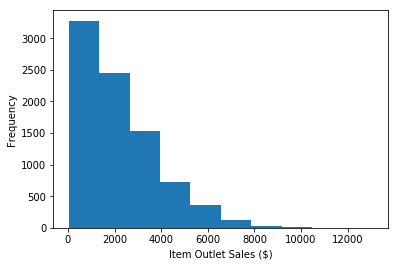

In [132]:
df_s['Item_Outlet_Sales'].plot.hist()
plt.xlabel("Item Outlet Sales ($)")
plt.show()

From the histogram, it does not seem that item sales follow a normal distribution, but instead, a decreasing exponential function. We shall use this information later, in our regression models.

Next, we check the outlet type of each outlet. 

In [109]:
df_outlet = df_s.groupby('Outlet_Identifier')['Outlet_Type'].unique().reset_index()
df_outlet

,Outlet_Identifier,Outlet_Type
0,OUT010,[Grocery Store]
1,OUT013,[Supermarket Type1]
2,OUT017,[Supermarket Type1]
3,OUT018,[Supermarket Type2]
4,OUT019,[Grocery Store]
5,OUT027,[Supermarket Type3]
6,OUT035,[Supermarket Type1]
7,OUT045,[Supermarket Type1]
8,OUT046,[Supermarket Type1]
9,OUT049,[Supermarket Type1]


We see that outlet 10 and 19 are grocery stores, while outlet 18 is the only outlet of type 2, and outlet 27 is the only outlet of type 3. Intuitively, we will see if it is possible to group outlet type 2 and outlet type 3 together, for ease of our analysis. Hence, we shall plot a bargraph of how outlet types affect sales.  

Text(0, 0.5, 'Average Sales ($)')

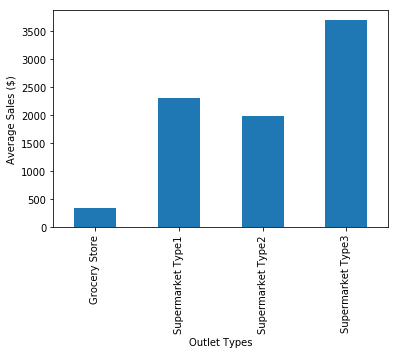

In [110]:
type_size = df_s['Outlet_Type'].value_counts()
df_type = df_s.groupby('Outlet_Type')['Item_Outlet_Sales'].sum()
df_type = df_type.div(type_size)

df_type.plot.bar()
plt.xlabel("Outlet Types")
plt.ylabel("Average Sales ($)")

We see that the outlet type 2 and outlet type 3 has very different average item sales, and thus we will not be grouping those two groups together. Proceeding with our analysis, we shall now analyse how each outlet differs in total sales. 

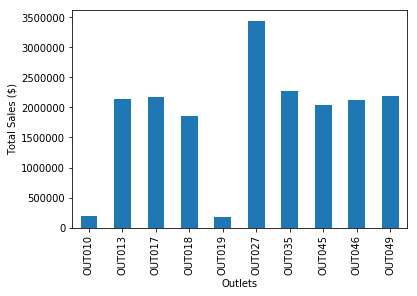

In [111]:
df_outlets = df_s.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum()

df_outlets.plot.bar()
plt.xlabel("Outlets")
plt.ylabel("Total Sales ($)")
plt.show()

We see that outlets 10 and 19 to enjoy significantly lower sales, which correspond to the fact they are grocery stores. Again, we see that outlet 18 (Type 2) and outlet 27 (Type 3) differ in their average sales as well. Since outlet 27 (Type 3) has a much higher average sales, a possible conclusion is that it is a hypermart that contributes to the much larger sales. 

From this graph (and the one above), we see that Outlet Type 2 supermarkets have a slightly lower average sales and total sales compared to outlet type 1 supermarkets. We shall further analyse the years that an outlet has been operating for to see if we can further discern between Outlet Type 1 and Type 2. 

In [112]:
df_outlet = df_s.groupby(['Outlet_Size','Outlet_Location_Type'])['Outlet_Identifier'].unique().reset_index()
df_outlet

,Outlet_Size,Outlet_Location_Type,Outlet_Identifier
0,High,Tier 3,[OUT013]
1,Medium,Tier 1,[OUT049]
2,Medium,Tier 3,"[OUT018, OUT027]"
3,Small,Tier 1,"[OUT046, OUT019]"
4,Small,Tier 2,"[OUT045, OUT017, OUT035]"
5,Small,Tier 3,[OUT010]


From the above dataframe, we see that Outlet 18 (type 2) and 27 (type 3) are both medium sized outlets, at a tier 3 outlet location type, but have large differences in their average and total sales. Thus, our group believes that a possible difference between Type 1 and Type 2 supermarkets is that a Type 2 supermarket is one that is built to be a hypermart that has yet to establish brand loyalty in that particulation region. 

Next, we shall use a box plot to examine how the sales of each outlet differ.


([<matplotlib.axis.XTick at 0x1661f3ea9e8>,
 <a list of 10 Text xticklabel objects>)

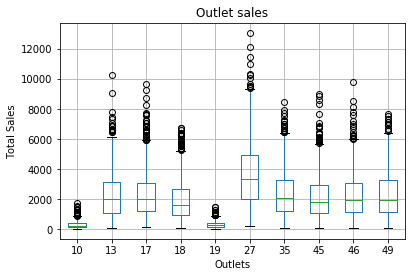

In [113]:
df_s.boxplot(column="Item_Outlet_Sales", by='Outlet_Identifier')
xtick = [1,2,3,4,5,6,7,8,9,10]
outlet = ["10","13","17","18","19","27","35","45","46","49"]
plt.suptitle("")
plt.title("Outlet sales")
plt.xlabel("Outlets")
plt.ylabel("Total Sales")
plt.xticks(xtick, outlet)

From the above graph, we can see that OUT027 has the highest variation in sales, though it manages to secure the highest amount of sales compared to other outlets. OUT027 is of supermarket Type 3, which also explains its volume of sales. Also, according to our hypothesis of Type 3 being a hypermart, it would be possible that they offer more products than other supermarket types, and thus leading to the greater variation in sales.

Let us observe how each outlet type performs by plotting a boxplot of their sales.

([<matplotlib.axis.XTick at 0x1661e1f4748>,
 <a list of 4 Text xticklabel objects>)

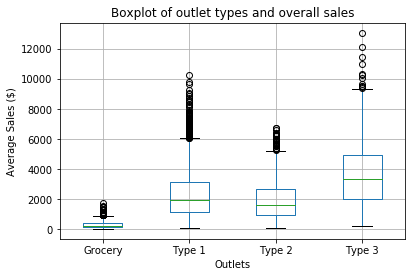

In [114]:
xtick = [1,2,3,4]
types = ["Grocery", "Type 1", "Type 2", "Type 3"]
df_s.boxplot(column='Item_Outlet_Sales', by='Outlet_Type')
plt.suptitle('')
plt.title('Boxplot of outlet types and overall sales')
plt.xlabel('Outlets')
plt.ylabel('Average Sales ($)')
plt.xticks(xtick, types)

From the boxplot above, we can see that although grocery stores have the lowest average sales compared to other outlet types, it has the lowest variance.

Comparing between Supermarket Type1 and Type2, the average sales of Type2 is considered marginally lower, compared to the huge difference in variance, with more outliers. Again, this could possible be due to a greater line of items offered.

Hence, if Prime Supermarket chooses to expand, they should look to build more Supermarket Type 3s, as it has the highest average sales that are way above the other outlet types. Also, Prime Supermarket should definitely look at avoid building more grocery stores as these stores have very low average sales. 

## 2.2 Outlet Types VS Average Sales

Here, we will go into greater details to find out how the outlet type affect sales of an outlet.
Let's make a further comparison with the location tier of the different outlet types.

In [115]:
# find the avg sales of a specific outlet type and tier.

def find_avg_sales_tier(outlet_type, tier):
    
    df_type_venue = df_s.groupby(['Outlet_Type', 'Outlet_Location_Type'])['Item_Outlet_Sales'].sum()
    
    size = ((df_s['Outlet_Type'] == outlet_type) & (df_s['Outlet_Location_Type'] == tier)).sum()
    avg_sales = df_type_venue[outlet_type][tier]/size
    return avg_sales

Outlet_Type        Outlet_Location_Type
Grocery Store      Tier 1                  1.795736e+05
                   Tier 3                  1.883402e+05
Supermarket Type1  Tier 1                  4.302365e+06
                   Tier 2                  6.472314e+06
                   Tier 3                  2.142664e+06
Supermarket Type2  Tier 3                  1.851823e+06
Supermarket Type3  Tier 3                  3.444468e+06
Name: Item_Outlet_Sales, dtype: float64


Text(0, 0.5, 'Average Sales ($)')

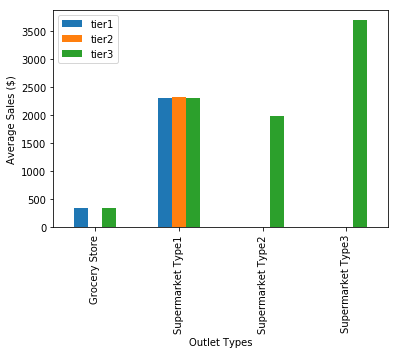

In [116]:
df_type_venue = df_s.groupby(['Outlet_Type', 'Outlet_Location_Type'])['Item_Outlet_Sales'].sum()
print(df_type_venue)

# from df_type_venue, we can see the various combinations of outlet type and tiers.

tier1 = pd.Series({'Grocery Store': find_avg_sales_tier('Grocery Store', 'Tier 1'),
                  'Supermarket Type1': find_avg_sales_tier('Supermarket Type1', 'Tier 1'),
                  'Supermarket Type2': 0,
                  'Supermarket Type3': 0})
tier2 = pd.Series({'Grocery Store': 0,
                   'Supermarket Type1': find_avg_sales_tier('Supermarket Type1', 'Tier 2'),
                   'Supermarket Type2': 0,
                   'Supermarket Type3': 0})
tier3 = pd.Series({'Grocery Store': find_avg_sales_tier('Grocery Store', 'Tier 3'),
                  'Supermarket Type1': find_avg_sales_tier('Supermarket Type1', 'Tier 3'),
                  'Supermarket Type2': find_avg_sales_tier('Supermarket Type2', 'Tier 3'),
                  'Supermarket Type3': find_avg_sales_tier('Supermarket Type3', 'Tier 3')})
# print(tier1)
# print(tier2)
# print(tier3)

avg_df =pd.DataFrame({'tier1': tier1,
                      'tier2': tier2,
                      'tier3': tier3})

avg_df.plot.bar()
plt.xlabel("Outlet Types")
plt.ylabel("Average Sales ($)")

As supermarket of Type2 and Type3 is only opened in Tier 3 locations, there is no basis of comparison between the different tiered locations with the specified supermarket type.

For both grocery store and supermarket type1, we can see that the different tiered locations does not affect the sales of the specified supermarket type.

One possible explanation for this is that in a country as dense as Singapore, the location type does not really matter for supermarkets, since there will always be Singaporeans that will frequent these supermarkets.

From all the above graphs, we cannot deduce anything specific about the outlet size, outlet type and location type. We can only conclude that grocery stores have much lower sales than other supermarkets, while a Type 3 Supermarket have much higher sales. We will have to make a more in-depth analysis into the type of items sold for each category of outlets.



## 2.3 Item Type VS Average Sales

Therefore, we will now compare the type of foods and their visibility.

Food               6121
Non_Consumables    1599
Drinks              799
Name: Item_Combined_Type, dtype: int64


Text(0, 0.5, 'Average Visibility of Item')

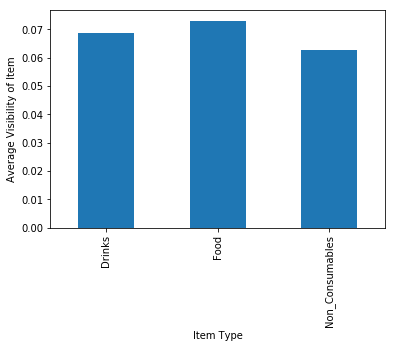

In [117]:
food_size = df_s['Item_Combined_Type'].value_counts()
print(food_size)
df_type = df_s.groupby('Item_Combined_Type')['Item_Visibility'].sum()
df_type = df_type.div(food_size)

df_type.plot.bar()
plt.xlabel("Item Type")
plt.ylabel("Average Visibility of Item")

Since food has a higher average visibility, we shall check the volume of sales for each type of food to see if visibility correlates with the sales.

Food               6121
Non_Consumables    1599
Drinks              799
Name: Item_Combined_Type, dtype: int64


Text(0, 0.5, 'Average Sales ($)')

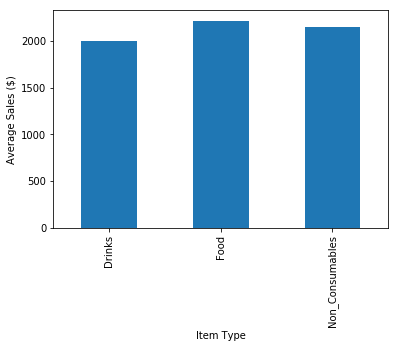

In [118]:
food_size = df_s['Item_Combined_Type'].value_counts()
print(food_size)
df_type = df_s.groupby('Item_Combined_Type')['Item_Outlet_Sales'].sum()
df_type = df_type.div(food_size)

df_type.plot.bar()
plt.xlabel("Item Type")
plt.ylabel("Average Sales ($)")

From this graph, we can possibly attribute the higher average sales of food to the higher visibility of food.

However, this relationship is not reflected for drinks and non-consumables. This may be due to the necessity of non-consumables such as detergent and light bulbs.

Now, we will analyse the performance of the sales of each category of items with each outlet type, as different category of items may be more popular in different outlet type 

In [119]:
# find the avg sales of a specific outlet type and the type of products sold.

def find_avg_sales_food(outlet_type, type_food):
    
    df_type_typeFood = df_s.groupby(['Outlet_Type', 'Item_Combined_Type'])['Item_Outlet_Sales'].sum()
    
    size = ((df_s['Outlet_Type'] == outlet_type) & (df_s['Item_Combined_Type'] == type_food)).sum()
    avg_sales = df_type_typeFood[outlet_type][type_food]/size
    return avg_sales

Outlet_Type        Item_Combined_Type
Grocery Store      Drinks                3.052693e+04
                   Food                  2.613858e+05
                   Non_Consumables       7.600107e+04
Supermarket Type1  Drinks                1.144867e+06
                   Food                  9.382348e+06
                   Non_Consumables       2.390127e+06
Supermarket Type2  Drinks                1.602388e+05
                   Food                  1.349399e+06
                   Non_Consumables       3.421852e+05
Supermarket Type3  Drinks                2.602366e+05
                   Food                  2.566334e+06
                   Non_Consumables       6.178977e+05
Name: Item_Outlet_Sales, dtype: float64


Text(0, 0.5, 'Average Sales ($)')

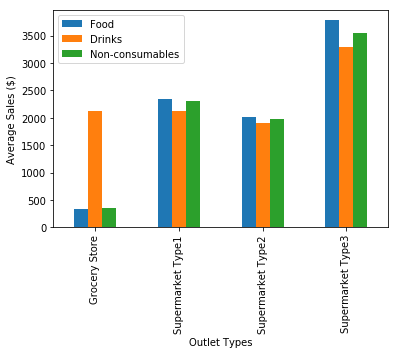

In [120]:
df_type_typeFood = df_s.groupby(['Outlet_Type', 'Item_Combined_Type'])['Item_Outlet_Sales'].sum()
print(df_type_typeFood)

# from df_type_venue, we can see the various combinations of outlet type and tiers.

food = pd.Series({'Grocery Store': find_avg_sales_food('Grocery Store', 'Food'),
                  'Supermarket Type1': find_avg_sales_food('Supermarket Type1', 'Food'),
                  'Supermarket Type2': find_avg_sales_food('Supermarket Type2', 'Food'),
                  'Supermarket Type3': find_avg_sales_food('Supermarket Type3', 'Food')})
drink = pd.Series({'Grocery Store': find_avg_sales_food('Supermarket Type1', 'Drinks'),
                   'Supermarket Type1': find_avg_sales_food('Supermarket Type1', 'Drinks'),
                   'Supermarket Type2': find_avg_sales_food('Supermarket Type2', 'Drinks'),
                   'Supermarket Type3': find_avg_sales_food('Supermarket Type3', 'Drinks')})
non_con = pd.Series({'Grocery Store': find_avg_sales_food('Grocery Store', 'Non_Consumables'),
                  'Supermarket Type1': find_avg_sales_food('Supermarket Type1', 'Non_Consumables'),
                  'Supermarket Type2': find_avg_sales_food('Supermarket Type2', 'Non_Consumables'),
                  'Supermarket Type3': find_avg_sales_food('Supermarket Type3', 'Non_Consumables')})
# print(tier1)
# print(tier2)
# print(tier3)

avg_df =pd.DataFrame({'Food': food,
                      'Drinks': drink,
                      'Non-consumables': non_con})

avg_df.plot.bar()
plt.xlabel("Outlet Types")
plt.ylabel("Average Sales ($)")

From the graph above, we can see that sales of drinks are the highest in grocery stores. However, the trend in the other types of outlets are generally the same - with highest sales in food, followed by non-consumables and finally drinks, though they don't differ too drastically in sales.

Since the sales of drinks performed consistently in all types of outlets, we will now analyse the type of drinks sold to see if any drinks are more popular.

Text(0, 0.5, 'Proportion')

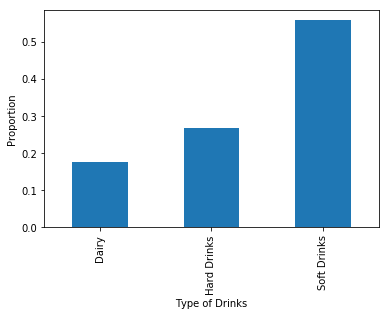

In [121]:
drinks = df_s[df_s['Item_Combined_Type'] == 'Drinks']
drinks_df = pd.DataFrame(data=drinks)
# print(drinks_df.head())
drinkstypes = drinks_df.groupby('Item_Type').size()
prop = drinkstypes.div(drinkstypes.sum())

prop.plot.bar()
plt.xlabel("Type of Drinks")
plt.ylabel("Proportion")

Soft drinks take up the largest proportion of the sales in drinks.

Let's try to analyse whether there are certain type of soft drinks that sells better.

Text(0, 0.5, 'Frequency')

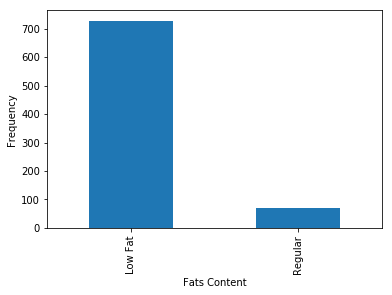

In [122]:
drinks_fats = drinks_df.groupby('Item_Fat_Content').count()
# print(drinks_fats)
drinks_fats['Item_Outlet_Sales'].plot.bar()

plt.xlabel("Fats Content")
plt.ylabel("Frequency")

Hence, from this graph, we can see that consumers are likely to be more health-conscious, as the sales of low-fat drinks are significantly higher than regular-fat drinks. Hence, Prime Supermarket should take note of consumers' behaviour and sell more low-fat soft drinks.

## 2.4 Item Visibility VS Total Sales

We will now try to analyse the factor of item visibility.

Intuitively, we shall see if item visibility (which is expressed as an arbitrary percentage) is related to item weight.

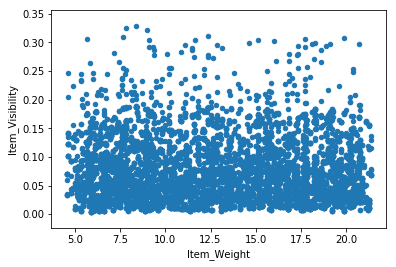

In [123]:
df_s.plot.scatter('Item_Weight', 'Item_Visibility')

From the above scatter plot, we see that there is no clear relationship between item visibility and item weight. Hence, we shall look to see the relationship between item visibility and sales in the different outlet types.

4


Text(0, 0.5, 'Total Sales ($)')

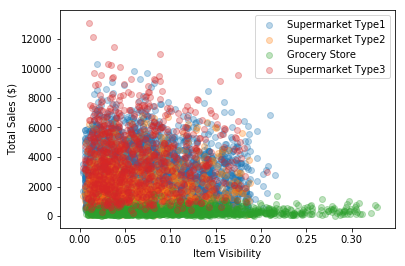

In [124]:
# df_s.plot.scatter('Item_Visibility', 'Item_Outlet_Sales')

outlet_types = df_s['Outlet_Type'].unique()
print(len(outlet_types))

groc_type = df_s.loc[:][df_s['Outlet_Type'] == outlet_types[0]]
type1 = df_s.loc[:][df_s['Outlet_Type'] == outlet_types[1]]
type2 = df_s.loc[:][df_s['Outlet_Type'] == outlet_types[2]]
type3 = df_s.loc[:][df_s['Outlet_Type'] == outlet_types[3]]

plt.scatter(groc_type['Item_Visibility'], groc_type['Item_Outlet_Sales'], alpha=0.3, label=outlet_types[0])
plt.scatter(type1['Item_Visibility'], type1['Item_Outlet_Sales'], alpha=0.3, label=outlet_types[1])
plt.scatter(type2['Item_Visibility'], type2['Item_Outlet_Sales'], alpha=0.3, label=outlet_types[2])
plt.scatter(type3['Item_Visibility'], type3['Item_Outlet_Sales'], alpha=0.3, label=outlet_types[3])

plt.legend()
plt.xlabel('Item Visibility')
plt.ylabel('Total Sales ($)')

From the scatter plot of the item visibility against the total sales of different outlet type, we can see that again, the grocery stores fill the bottom of all total sales. Similar to the previous section, we cannot clearly discern between the sales of the 3 different types of supermarkets. Another intersting observation, however, is that items with higher visibilities do not necessarily translate to higher sales. In fact, the items that fetched the highest total sales mostly had an item visibility of less than 10%. This could be perhaps due to the nature of a supermarket, where people already know what they want to buy, and thus the item visibility does not really affect sales.

In conclusion, from our various data visualisations, we have seen certain interesting relationships between the variables which will help to shape our regression model in the following segment. 

# 3. Regression Model Construction & Evaluation 

For this segment, we are interested in finding out if any of the variables listed above is indeed correlated with the outlet sales . We determine this by creating a null hypothesis and an alternative hypothesis, $H_{0}$ and $H_{1}$ respectively. The hypothesis test is set up as follows:

Null Hypothesis : All variables are insignificant in determining Y (item outlet sales)
Alternative Hypothesis: Some variables are significant in determining Y (item outlet sales)


<center>$H_{0}$ :  β = 0  </center>

<center>$H_{1}$ :  β ≠ 0 </center>
<center>where  β  is the coefficient of all the variables discussed above.</center>

# 3.1 Using Product Variables
We first start with the Baseline Model for regression, considering only the variables that affect the product and not the outlets.

In [125]:
products = smf.ols("Item_Outlet_Sales ~ Item_Weight + Item_Fat_Content + Item_Visibility + \
C(Item_Combined_Type, Treatment(reference = 'Non_Consumables')) + Item_MRP", data= df_s).fit()
print(products.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     724.9
Date:                Fri, 19 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:37:32   Log-Likelihood:                -73729.
No. Observations:                8519   AIC:                         1.475e+05
Df Residuals:                    8512   BIC:                         1.475e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

From this simple regression model, we obtain an $R^2$ and adjusted $R^2$ value of 0.338, which indicates that our variables have some impact on the sales of an item in an outlet, even before doing any adjustments.

Also, the probability of the F-statistic is lower than 5% which indicates that at least one of the variables can be useful in predicting sales of an item in an outlet. 

Upon further examination, we see that the item weights do not really affect the sales of an item in an outlet. 

Also, regular fat items and food items are statistically significant in affecting sales of an item in an outlet, while low-fat items and drinks are not. 

# 3.2 Using Outlet Variables
Next, let us examine how outlet variables can affect item sales.

In [126]:
outlet = smf.ols("Item_Outlet_Sales ~ Outlet_Size + Outlet_Location_Type + Outlet_Type + Outlet_Years", data= df_s).fit()
print(outlet.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     335.6
Date:                Fri, 19 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:37:32   Log-Likelihood:                -74320.
No. Observations:                8519   AIC:                         1.487e+05
Df Residuals:                    8510   BIC:                         1.487e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

As we can see, the $R^2$ and adjusted $R^2$ value of this model is lower, at 0.240 and 0.239 respectively. The AIC and BIC is also slightly heavier than the first model, which implies that this model is slightly worse at predicting item outlet sales.

Again, the probability of the F-statistic is < 0.05, telling us that at least 1 of the variables is effective in predicting the item outlet sales of Prime Supermarket. Upon further analysis, we see that only the outlet type seems to affect the item outlet sales. 

# 3.3 Using Selected Variables
Next, we take a combined model, using only those variables which have a p-value of < 0.05 to obtain another linear regression model. 

In [127]:
combined = smf.ols(" Item_Outlet_Sales ~ Item_Fat_Content + Item_Visibility \
+ Item_MRP + C(Item_Combined_Type, Treatment(reference = 'Non_Consumables')) + Outlet_Type", data= df_s).fit()
print(combined.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     1366.
Date:                Fri, 19 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:37:32   Log-Likelihood:                -71969.
No. Observations:                8519   AIC:                         1.440e+05
Df Residuals:                    8510   BIC:                         1.440e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

We can immediately see that this model is much better than the previous 2 models, with a much higher $R^2$ and adjusted $R^2$ value as compared to the previous 2 models. The AIC & BIC of this model is also much lower than the previous 2 models.

Once again, the probability of the F-statistic is < 0.05, and thus there is at least 1 variable that would affect item sales in the Prime Supermarket outlets.

Also, from this model, we see that the previously statistically significant item fat content, item combined types and item visibility are no longer statistically significant in this regression model. Only the item's maxmimum retail price and outlet types are statistically significant in predicting item sales in the outlets.

# 3.4 Non-Linear Relationships
Let us attempt to improve the model even further, by introducing nonlinearity to the model. As seen from above, the item outlet sales seems to follow an exponential distribution. Here, we can try to take log of the item outlet sales to see if this improves our linear regression model.

In [128]:
log = smf.ols(" np.log(Item_Outlet_Sales) ~ Item_Fat_Content + Item_Visibility \
+ Item_MRP + C(Item_Combined_Type, Treatment(reference = 'Non_Consumables')) + Outlet_Type", data= df_s).fit()
print(log.summary())

                                OLS Regression Results                               
Dep. Variable:     np.log(Item_Outlet_Sales)   R-squared:                       0.720
Model:                                   OLS   Adj. R-squared:                  0.719
Method:                        Least Squares   F-statistic:                     2730.
Date:                       Fri, 19 Apr 2019   Prob (F-statistic):               0.00
Time:                               15:37:32   Log-Likelihood:                -6813.6
No. Observations:                       8519   AIC:                         1.365e+04
Df Residuals:                           8510   BIC:                         1.371e+04
Df Model:                                  8                                         
Covariance Type:                   nonrobust                                         
                                                                              coef    std err          t      P>|t|      [0.025      0.975]


We notice a huge jump in the $R^2$ and adjusted $R^2$ value for the model, at 0.720 and 0.719 respectively. Also, the AIC and BIC values are much lower than before. This is a large improvement from the previous model, and it is clear that we should use this model to proceed further with our analysis.

# 3.5 Modelling for Interactivity
Given the many variables in the data, it is likely that there are some interactivity between these differing variable types. Here we explore 2 possible interactivity. How item weight may affect the item visibility, and how the outlet sizes the outlets affect the outlet types.

# 3.5.1 Item Weight & Item Visibility
First, let us model for the interactivity between item weight and item visibility.

In [129]:
weight = smf.ols(" np.log(Item_Outlet_Sales) ~ Item_Fat_Content + Item_Visibility * Item_Weight + Item_MRP \
+ C(Item_Combined_Type, Treatment(reference = 'Non_Consumables')) + Outlet_Type", data= df_s).fit()
print(weight.summary())

                                OLS Regression Results                               
Dep. Variable:     np.log(Item_Outlet_Sales)   R-squared:                       0.720
Model:                                   OLS   Adj. R-squared:                  0.719
Method:                        Least Squares   F-statistic:                     2184.
Date:                       Fri, 19 Apr 2019   Prob (F-statistic):               0.00
Time:                               15:37:32   Log-Likelihood:                -6813.5
No. Observations:                       8519   AIC:                         1.365e+04
Df Residuals:                           8508   BIC:                         1.373e+04
Df Model:                                 10                                         
Covariance Type:                   nonrobust                                         
                                                                              coef    std err          t      P>|t|      [0.025      0.975]


From this, we can see that our hypothesis of a relationship between item visibility and item weight is wrong, as the relationship is not statistically significant. (Item_Visibility:Item_Weight has a p-value of 0.816, statistically insiginificant).

# 3.5.2 Outlet Size & Outlet Type

Although previously, we saw that outlet sizes are not statistically significant to predict item sales in an outlet, there is a high likelihood that outlet types also depends on outlet sizes. 

Thus, we attempt to model for this interactivity to see if we can obtain a better regression model to predict sales of items in Prime Supermarket outlets.

First, let us look at the average outlet sales of each outlet type.

In [130]:
types = df_s.groupby(["Outlet_Type"])["Item_Outlet_Sales"].mean()
types.head()

Outlet_Type
Grocery Store         340.031198
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Supermarket Type3    3695.781505
Name: Item_Outlet_Sales, dtype: float64

From the above, we see that while there is no clear difference in the sales of Supermarket 1 & 2, the sales of grocery stores are much lower than supermarkets. Next, the Supermarket Type 3 has the highest sales of all outlet types. This could perhaps mean that Supermarket Type 3 is equivalent to that of a hypermart.

In [131]:
size = smf.ols(" np.log(Item_Outlet_Sales) ~ Item_Fat_Content + Item_Visibility + Item_MRP \
+ C(Item_Combined_Type, Treatment(reference = 'Non_Consumables')) + Outlet_Size * Outlet_Type ", data= df_s).fit()
print(size.summary())

                                OLS Regression Results                               
Dep. Variable:     np.log(Item_Outlet_Sales)   R-squared:                       0.720
Model:                                   OLS   Adj. R-squared:                  0.720
Method:                        Least Squares   F-statistic:                     2186.
Date:                       Fri, 19 Apr 2019   Prob (F-statistic):               0.00
Time:                               15:37:33   Log-Likelihood:                -6810.2
No. Observations:                       8519   AIC:                         1.364e+04
Df Residuals:                           8508   BIC:                         1.372e+04
Df Model:                                 10                                         
Covariance Type:                   nonrobust                                         
                                                                              coef    std err          t      P>|t|      [0.025      0.975]


C:\Users\Yong Han Ching\Anaconda3\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\Yong Han Ching\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Yong Han Ching\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Yong Han Ching\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Now at a first glance, this regression model provides us with the same $R^2$, adjusted $R^2$ value and probability of the F-statistic as the previous model.

However, our AIC and BIC has decreased slightly, by 1 point, which indicates that this is a slightly better model to use to predict item outlet sales. 

Upon further analysis, this model now tells us that outlet size can be statistically significant in determining the item sales in outlets, where previously it was not.

Also, we can see that there are clear interactions between certain outlet sizes and outlet types. There are no Small Supermarkets of type 2 and type 3, as previously hypothesized that Type 3 supermarkets are larger. The medium sized type 2 supermarkets also have no statistical significance in affecting item sales of the different outlets.

# 3.6 Conclusion on Regression
We have decided to use the above model as the final model for predicting item sales in outlets. 

From the regression model, we see that out of all the variables that could affect item sales in outlets, the maximum retail price of an item is likely to be the most significant in affecting item sales. Next, outlet type and size is also likely to play a huge part in affecting item sales, compared to other factors. 

This is in line with what one may expect, as ultimately, the dollar sales of an item is directly correlated to the price of the item. Similarly, supermarkets that are larger, and of a better "type", are likely to offer a wider range of products, and thus have higher sales of items in those outlets. 

Interestingly, there seems to be an exponential correlation between these variables with the item outlet sales, as the logarithmic model has a higher $R^2$ value, and lower AIC and BIC values than the other models.

Thus, the null hypothesis is rejected for the Item Maximum Retail Price, as well as the Outlet Types & Sizes for this regression model. 